<a href="https://colab.research.google.com/github/jaco-uoeo/ml-artefact/blob/main/Unit06/k-means-wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# @title Dependencies

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.cluster import KMeans

In [8]:
# @title Load data

df = pd.read_csv("https://raw.githubusercontent.com/jaco-uoeo/ml-artefact/refs/heads/main/Unit06/wine.csv")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
# @title Pre-processing

# Use only feature columns, i.e.exclude the class label
X = df.iloc[:, 1:].values
y_true = df['Wine'].values

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

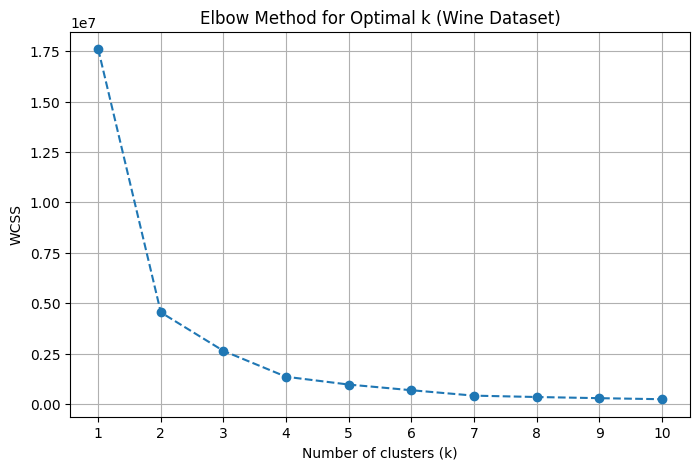

In [12]:
# @title Determine Clusters

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k (Wine Dataset)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

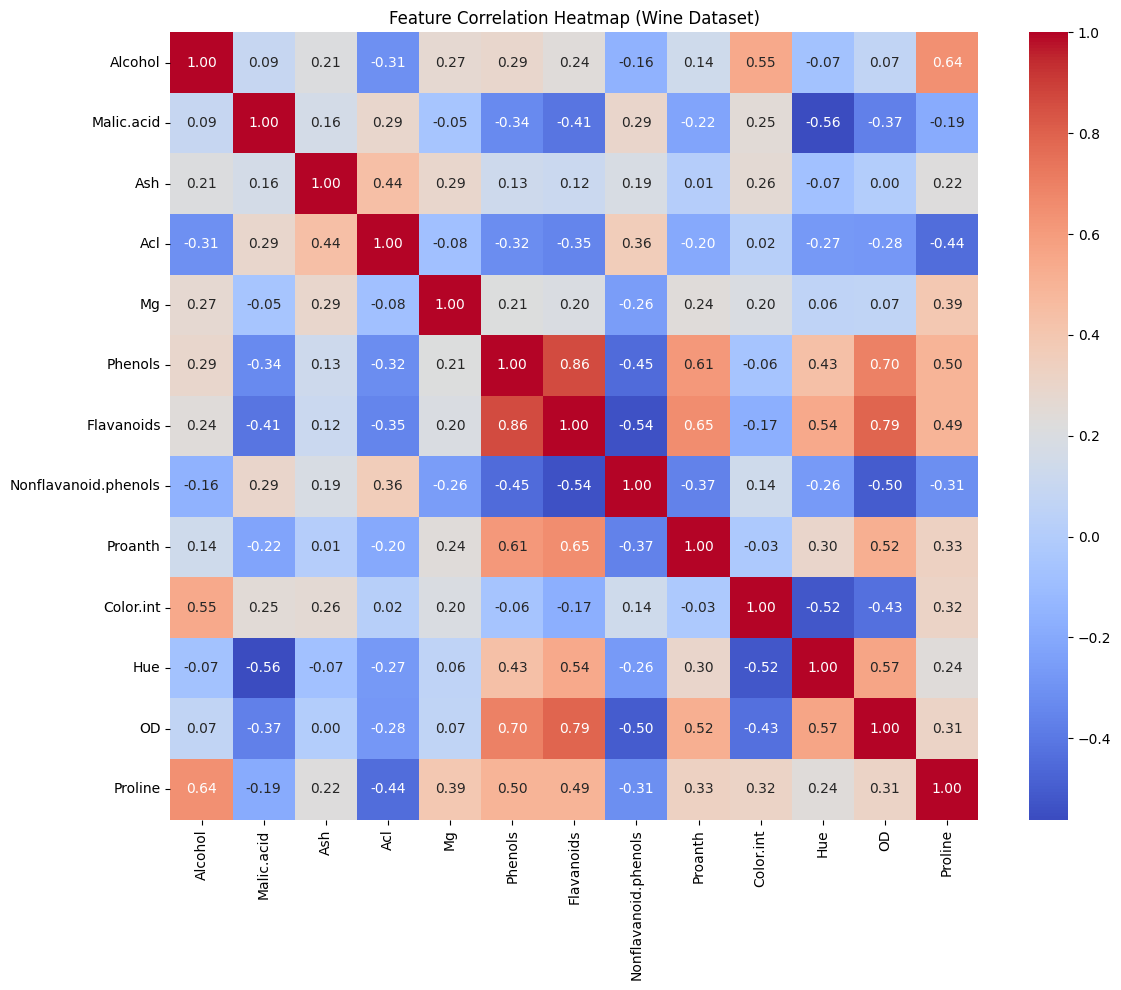

In [13]:
# @title Correlation

plt.figure(figsize=(12, 10))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap (Wine Dataset)')
plt.tight_layout()
plt.show()

In [14]:
# @title K-Means

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

aligned_labels = np.zeros_like(y_kmeans)
for i in range(3):
    mask = (y_kmeans == i)
    aligned_labels[mask] = mode(y_true[mask], keepdims=False).mode

In [15]:
# @title Evaluation

conf_matrix = confusion_matrix(y_true, aligned_labels)
conf_df = pd.DataFrame(conf_matrix,
                       index=[f"True {i}" for i in np.unique(y_true)],
                       columns=[f"Cluster {i}" for i in range(1, 4)])

print("Confusion Matrix:")
print(conf_df)

accuracy = accuracy_score(y_true, aligned_labels)
print(f"\nAccuracy after alignment: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_true, aligned_labels))

Confusion Matrix:
        Cluster 1  Cluster 2  Cluster 3
True 1         59          0          0
True 2          3         65          3
True 3          0          0         48

Accuracy after alignment: 0.97

Classification Report:
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        59
           2       1.00      0.92      0.96        71
           3       0.94      1.00      0.97        48

    accuracy                           0.97       178
   macro avg       0.96      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178

